# Homework

### Dataset

In this homework, we will use the California Housing Prices data from Kaggle.

Here's a wget-able link:
```
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

We'll keep working with the 'median_house_value' variable, and we'll transform it to a classification task.

### Features

For the rest of the homework, you'll need to use only these columns:

* 'latitude',
* 'longitude',
* 'housing_median_age',
* 'total_rooms',
* 'total_bedrooms',
* 'population',
* 'households',
* 'median_income',
* 'median_house_value',
* 'ocean_proximity',

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
* Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
* Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("~/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households',
           'median_income', 'median_house_value', 'ocean_proximity']
features_no_target = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households',
           'median_income', 'ocean_proximity']

In [4]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df[features].isna().any()

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [6]:
df[features].isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Fill NAs with 0

In [7]:
new_df_features = df[features].fillna(0).copy()

In [8]:
new_df_features[features].isna().any()

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [9]:
new_df_features['rooms_per_household'] = new_df_features['total_rooms'] / new_df_features['households']

In [10]:
new_df_features['bedrooms_per_room'] = new_df_features['total_bedrooms'] / new_df_features['total_rooms']

In [11]:
new_df_features['population_per_household'] = new_df_features['population'] / new_df_features['households']

In [12]:
new_df_features.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


### Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

Options:

* NEAR BAY
* <1H OCEAN
* INLAND
* NEAR OCEAN

Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value (median_house_value) is not in your dataframe.

In [13]:
new_df_features['ocean_proximity'].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

In [14]:
new_df_features['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Split the data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
np.random.seed(42)

In [17]:
df_full_train, df_test = train_test_split(new_df_features, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [18]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 2

* Create the correlation matrix for the numerical features of your train dataset.
    * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:

* total_bedrooms and households
* total_bedrooms and total_rooms
* population and households
* population_per_household and total_rooms

### Make median_house_value binary

* We need to turn the median_house_value variable from numeric into binary.
* Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [21]:
correlation_matrix = new_df_features.corr()
correlation_matrix

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,-0.065318,0.068082,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,-0.108785,0.099773,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


In [22]:
correlation_matrix.max()

latitude                    1.0
longitude                   1.0
housing_median_age          1.0
total_rooms                 1.0
total_bedrooms              1.0
population                  1.0
households                  1.0
median_income               1.0
median_house_value          1.0
rooms_per_household         1.0
bedrooms_per_room           1.0
population_per_household    1.0
dtype: float64

In [23]:
correlation_matrix.unstack().sort_values(ascending=False)

latitude             latitude               1.000000
longitude            longitude              1.000000
bedrooms_per_room    bedrooms_per_room      1.000000
rooms_per_household  rooms_per_household    1.000000
median_house_value   median_house_value     1.000000
                                              ...   
rooms_per_household  bedrooms_per_room     -0.387465
bedrooms_per_room    median_income         -0.573836
median_income        bedrooms_per_room     -0.573836
latitude             longitude             -0.924664
longitude            latitude              -0.924664
Length: 144, dtype: float64

<AxesSubplot: >

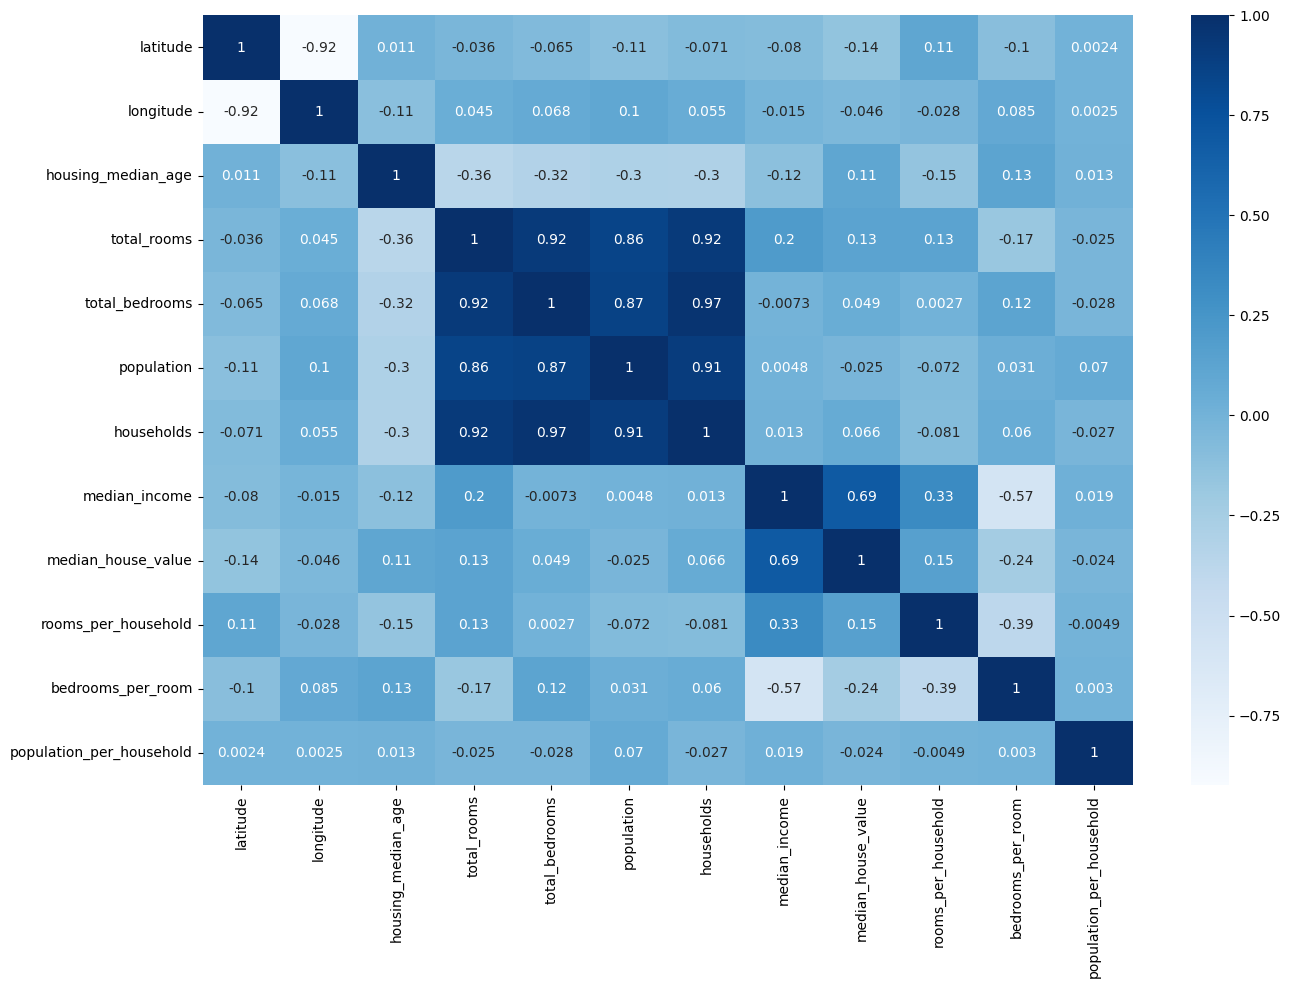

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")

In [25]:
mean = new_df_features.median_house_value.mean()
print(mean)

206855.81690891474


In [26]:
above_average = (y_train >= 206855)

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using round(score, 2)

Options:

* 0.26
* 0
* 0.10
* 0.16

In [27]:
df_train.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
mutual_info_score(df_train['ocean_proximity'], above_average).round(2)

0.1

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

* 0.60
* 0.72
* 0.84
* 0.95


In [30]:
from sklearn.feature_extraction import DictVectorizer

In [31]:
dv = DictVectorizer(sparse=False)

In [32]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)

In [33]:
dv.get_feature_names()

/Users/giovanni/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [34]:
above_average = above_average.astype('int')
above_average

array([1, 0, 0, ..., 1, 0, 0])

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, above_average)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
above_average_val = (y_val >= 206855)
above_average_val.astype(int)
above_average_val

array([ True,  True, False, ...,  True,  True, False])

In [39]:
y_pred = model.predict_proba(X_train)[:,1]
predictions = (y_pred >= 0.5)
(above_average == predictions).mean()

0.8350290697674418

In [40]:
y_pred = model.predict_proba(X_val)[:,1]
predictions = (y_pred >= 0.5)
(above_average_val == predictions).mean().round(2)

0.82

In [41]:
np.round(accuracy_score(above_average_val, predictions), 2)

0.82

### Question 5

* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    * total_rooms
    * total_bedrooms
    * population
    * households

In [42]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, above_average)

y_pred = model.predict_proba(X_val)[:,1]
predictions = (y_pred >= 0.5)
global_acc = (above_average_val == predictions).mean()

print(global_acc)

0.8231589147286822


In [43]:
accs = []
for f in features_no_target:
    # debug
    #print(f)

    # copy the datasets and remove the feature
    df_train_q5 = df_train.copy()
    del df_train_q5[f]
    df_val_q5 = df_val.copy()
    del df_val_q5[f]

    # One-hot encode and feature matrices
    train_dict_q5 = df_train_q5.to_dict(orient='records')
    val_dict_q5 = df_val_q5.to_dict(orient='records')

    dv.fit(train_dict_q5)

    X_train_q5 = dv.transform(train_dict_q5)
    X_val_q5 = dv.transform(val_dict_q5)

    # create and train model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_q5, above_average)

    # calculate accuracy with validation dataset
    y_pred_q5 = model.predict_proba(X_val_q5)[:,1]
    predictions_q5 = (y_pred_q5 >= 0.5)
    acc = (above_average_val == predictions_q5).mean()
    accs.append((f, acc))

In [44]:
print(global_acc)
print(accs)

0.8231589147286822
[('latitude', 0.8202519379844961), ('longitude', 0.8207364341085271), ('housing_median_age', 0.8192829457364341), ('total_rooms', 0.8236434108527132), ('total_bedrooms', 0.8226744186046512), ('population', 0.813953488372093), ('households', 0.8175872093023255), ('median_income', 0.7747093023255814), ('ocean_proximity', 0.8057170542635659)]


In [45]:
diffs = []
diffs_tup = []
for i in range(len(accs)):
    # we store the absolute value
    diffs.append(global_acc - accs[i][1])
    diffs_tup.append((accs[i][0], global_acc - accs[i][1]))

In [46]:
diffs

[0.0029069767441860517,
 0.002422480620155043,
 0.003875968992248069,
 -0.0004844961240310086,
 0.0004844961240310086,
 0.009205426356589164,
 0.0055717054263566546,
 0.04844961240310075,
 0.01744186046511631]

In [47]:
diffs_tup

[('latitude', 0.0029069767441860517),
 ('longitude', 0.002422480620155043),
 ('housing_median_age', 0.003875968992248069),
 ('total_rooms', -0.0004844961240310086),
 ('total_bedrooms', 0.0004844961240310086),
 ('population', 0.009205426356589164),
 ('households', 0.0055717054263566546),
 ('median_income', 0.04844961240310075),
 ('ocean_proximity', 0.01744186046511631)]

In [48]:
min_value = min(diffs)
min_index = diffs.index(min_value)
print(min_value)
print(min_index)

-0.0004844961240310086
3


In [49]:
print(accs[min_index])

('total_rooms', 0.8236434108527132)


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

Options:

* 0
* 0.01
* 0.1
* 1
* 10

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [51]:
y_train_lin = np.log1p(y_train)
y_val_lin = np.log1p(y_val)

In [52]:
model = Ridge()
model.fit(X_train, y_train_lin)

Ridge()

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
y_pred = model.predict(X_val)
print(mean_squared_error(y_val_lin, y_pred, squared=False))
print(mean_squared_error(y_val, np.expm1(y_pred), squared=False))

0.3262931903303197
86470.59504355394


In [55]:
print(y_pred)
print(y_val_lin)
print(np.expm1(y_pred))
print(y_val)

[12.78879686 13.25510161 11.6721853  ... 12.55570012 12.4603642
 12.3325861 ]
[12.56898162 13.12236738 11.11989769 ... 12.81963805 12.29087784
 12.1884228 ]
[358181.12267913 570974.51811961 117263.25962041 ... 283706.80166548
 257908.54562378 226971.9445736 ]
[287500. 500001.  67500. ... 369400. 217700. 196500.]


In [56]:
alphas = [0, 0.01, 0.1, 1, 10]

In [57]:
errors = []
errors_exp = []
for a in alphas:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train_lin)
    y_preds = model.predict(X_val)
    errors.append((a, mean_squared_error(y_val_lin, y_preds, squared=False).round(3)))
    errors_exp.append((a, mean_squared_error(y_val, np.expm1(y_preds), squared=False).round(3)))

In [58]:
print(errors)
print(errors_exp)

[(0, 0.531), (0.01, 0.531), (0.1, 0.531), (1, 0.531), (10, 0.531)]
[(0, 112688.583), (0.01, 112688.584), (0.1, 112688.584), (1, 112688.584), (10, 112689.767)]
